In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

(<matplotlib.image.AxesImage at 0x7f30944122f0>,
 <matplotlib.image.AxesImage at 0x7f3094437ca0>)

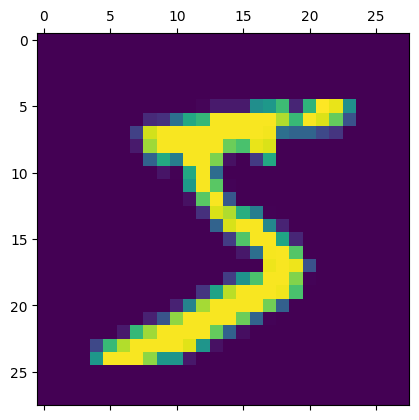

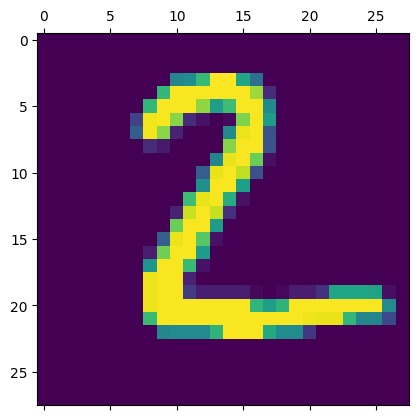

In [25]:
plt.matshow(x_train[0]), plt.matshow(x_test[1])

# Normalize the data


In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train_flatten = x_train.reshape(len(x_train), 28 * 28)
x_test_flatten = x_test.reshape(len(x_test), 28 * 28)

x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

# Very simple neural network with no hidden layers


In [28]:
model1 = Sequential(
    [
        Dense(10, input_shape=(784,), activation="sigmoid"),
    ]
)
model1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model1.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


/home/ahmed/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8123 - loss: 0.7288
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 0.9128 - loss: 0.3153
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.9219 - loss: 0.2821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - accuracy: 0.9228 - loss: 0.2793
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.9285 - loss: 0.2595


In [29]:
model1.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9147 - loss: 0.3046


[0.26799070835113525, 0.9258999824523926]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


<Axes: >

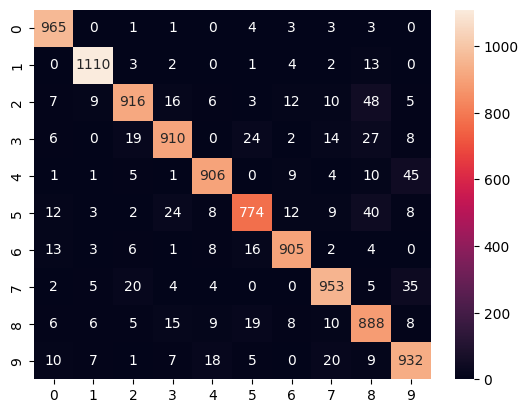

In [32]:
y_predicted = model1.predict(x_test_flatten)
y_predicted_labels = [
    np.argmax(i) for i in y_predicted
]  # for making the prediction in the form of labels, by taking the maximum value of the prediction
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")

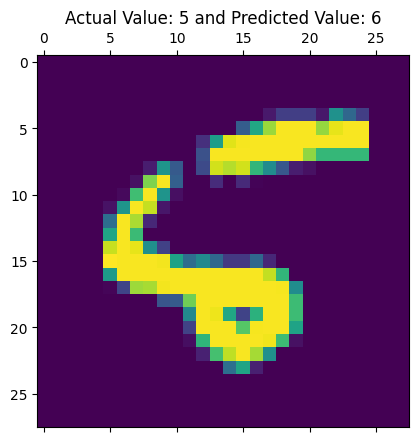

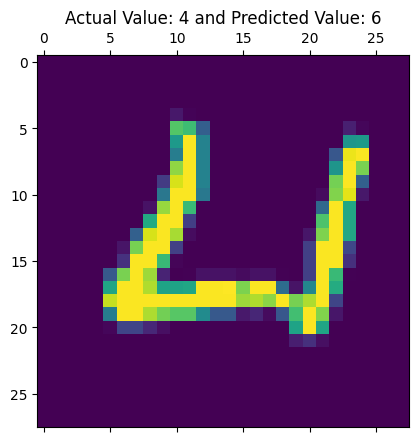

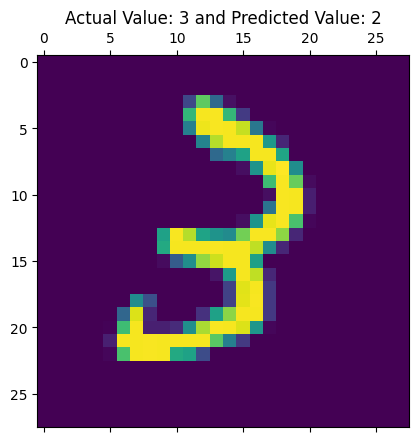

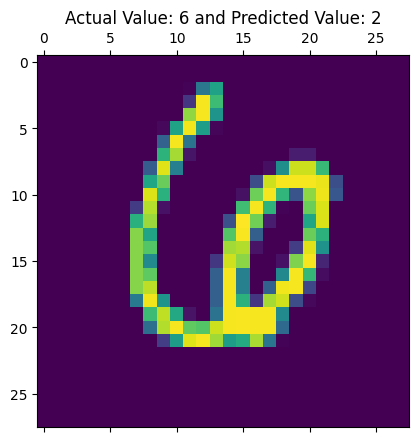

In [39]:
for i in range(100):
    if y_test[i] != y_predicted_labels[i]:
        plt.matshow(x_test[i])
        plt.title(
            f"Actual Value: {y_test[i]} and Predicted Value: {y_predicted_labels[i]}"
        )

# Using hidden layer


In [40]:
model2 = Sequential(
    [Dense(100, input_shape=(784,), activation="relu"), Dense(10, activation="sigmoid")]
)
model2.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model2.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5


/home/ahmed/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8705 - loss: 0.4553
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.9609 - loss: 0.1353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.9741 - loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.9797 - loss: 0.0662
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9851 - loss: 0.0498


In [44]:
model2.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9714 - loss: 0.0944


[0.08308415859937668, 0.9735000133514404]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


<Axes: >

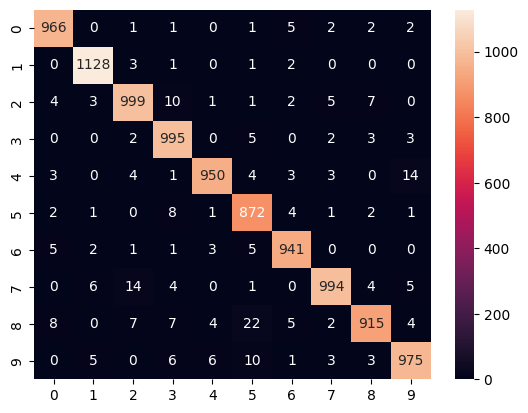

In [45]:
y_predicted = model2.predict(x_test_flatten)
y_predicted_labels = [
    np.argmax(i) for i in y_predicted
]  # for making the prediction in the form of labels, by taking the maximum value of the prediction
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")

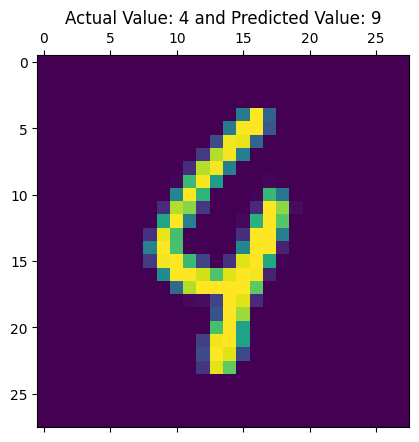

In [49]:
for i in range(200):
    if y_test[i] != y_predicted_labels[i]:
        plt.matshow(x_test[i])
        plt.title(
            f"Actual Value: {y_test[i]} and Predicted Value: {y_predicted_labels[i]}"
        )